In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import numpy as np

# plt.style.use('ggplot')


In [2]:
btc_data = pd.read_csv("BTC-USD.csv")
btc_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800.0
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200.0
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700.0
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600.0
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100.0


In [3]:
btc_data['Date'] = pd.to_datetime(btc_data['Date'])

In [4]:

btc_data = btc_data.set_index('Date')

<AxesSubplot:xlabel='Date'>

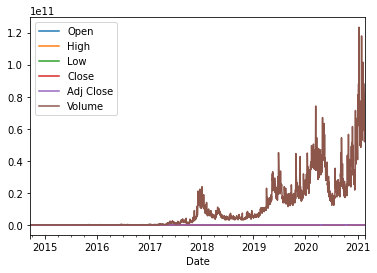

In [5]:
btc_data.plot()

In [30]:
import pandas as pd
url = 'https://raw.githubusercontent.com/jessems/WeimarInflationData/master/weimar_inflation_data.csv'
weimar_df = pd.read_csv(url)
weimar_df['Day'] = weimar_df['Day'].astype(str)

In [31]:
weimar_df

,Year,Month,Day,Mark,Gold
0,1918,January,nan,10,8.0
1,1918,February,nan,10,8.0
2,1918,March,nan,10,8.0
3,1918,April,nan,10,8.0
4,1918,May,nan,10,8.0
...,...,...,...,...,...
281,1923,November,26,1000000000000,1.0
282,1923,November,27,1000000000000,1.0
283,1923,November,28,1000000000000,1.0
284,1923,November,29,1000000000000,1.0


In [10]:
# Fill in the empty values
# start_date = datetime.date(1918,1,1)
# end_date = datetime.date(1923,11,30)
# delta = datetime.timedelta(days=1)

# while start_date <= end_date:
    

In [57]:
weimar_dates = pd.date_range(datetime(1918,1,1), datetime(1923,11,30), freq='D')
mark_gold_ratio = weimar_df['Mark']/weimar_df['Gold']
mark_gold_ratio_placeholder = np.zeros(len(weimar_dates), dtype='float32')

In [75]:
df_weimar_clean = pd.DataFrame({'Date': weimar_dates, 'Mark/Gold': np.zeros(len(weimar_dates))})
df_weimar_clean

,Date,Mark/Gold
0,1918-01-01,0.0
1,1918-01-02,0.0
2,1918-01-03,0.0
3,1918-01-04,0.0
4,1918-01-05,0.0
...,...,...
2155,1923-11-26,0.0
2156,1923-11-27,0.0
2157,1923-11-28,0.0
2158,1923-11-29,0.0


In [60]:
weimar_df['Mark/Gold'] = weimar_df['Mark']/weimar_df['Gold']

In [14]:
# weimar_df[(weimar_df['Year'] == 1918) & weimar_df['Month'] != 'January']
weimar_df[(weimar_df['Month'] == 'January') & (weimar_df['Year'] == 1918)]

,Year,Month,Day,Mark,Gold,Mark/Gold
0,1918,January,NaN,10,8.0,1.25


In [86]:
df_weimar_clean = pd.DataFrame({'Date': weimar_dates, 'Mark/Gold': np.zeros(len(weimar_dates))})
for i, r in df_weimar_clean.iterrows():
    current_date = r['Date']
    current_year = current_date.year # string
    current_month = current_date.strftime("%B") # string
    current_day = current_date.day # int
    for j, ro in weimar_df.iterrows():
        if((current_year == int(ro['Year'])) & (current_month == ro['Month']) & (str(current_day) == ro['Day'])):
            r['Mark/Gold'] = ro['Mark/Gold']
            df_weimar_clean.iloc[i] = r
        elif((current_year == int(ro['Year'])) & (current_month == ro['Month']) & ((current_day >= 1) & (current_day <= 10) & ('1-10' in ro['Day']))):
            r['Mark/Gold'] = ro['Mark/Gold']
            df_weimar_clean.iloc[i] = r
        elif((current_year == int(ro['Year'])) & (current_month == ro['Month']) & ((current_day >= 11) & (current_day <= 20) & ('11-20' in ro['Day']))):
            r['Mark/Gold'] = ro['Mark/Gold']
            df_weimar_clean.iloc[i] = r
        elif((current_year == int(ro['Year'])) & (current_month == ro['Month']) & ((current_day >= 21) & (current_day <= 31) & ('21-' in ro['Day']))):
            r['Mark/Gold'] = ro['Mark/Gold']
            df_weimar_clean.iloc[i] = r


In [87]:
df_weimar_clean.to_csv('weimar_processed.csv')

In [78]:
df_weimar_clean

,Date,Mark/Gold
0,1918-01-01,0.000000e+00
1,1918-01-02,0.000000e+00
2,1918-01-03,0.000000e+00
3,1918-01-04,0.000000e+00
4,1918-01-05,0.000000e+00
...,...,...
2155,1923-11-26,1.000000e+12
2156,1923-11-27,1.000000e+12
2157,1923-11-28,1.000000e+12
2158,1923-11-29,1.000000e+12
